## Projeto do Módulo 01

Projeto de conclusão do Móulo 01 do Bootcamp de Data Science da Alura <br><br>

Neste projeto analisaremos os dados do SUS para ter um comparativos entre os Estados. Vamos analisar os dados para entender se os gastos são proporcioanais aos atendimentos, além de óbitos, dias de permanência, entre outros, tudo isso relacionado à população de cada Estado para termos um entendimento da situação do <b>Sistema Único de Saúde</b>

Descrição do Escopo:<br>
País: Brasil<br>
Período: Janeiro/2011 a Dezembro/2020

Os dados do SUS foram obtidos do DATASUS em http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe%253Fsih/cnv/qi

Descrição dos dados do SUS utilizados:

Ano e mês de atendimento:
Período correspondente à data de internação do paciente na unidade hospitalar.

Internações:
Quantidade de AIH (Autorização de Internação Hospitalar) aprovadas no período, não considerando as de prorrogação (longa permanência). Este é um valor aproximado das internações, pois as transferências e reinternações estão aqui computadas.

Valor total:
Valor referente às AIH aprovadas no período. Este valor não obrigatoriamente corresponde ao valor repassado ao estabelecimento, pois, dependendo da situação das unidades, estes recebem recursos orçamentários ou pode haver retenções e pagamentos de incentivos, não aqui apresentados. Portanto, este valor deve ser considerado como o valor aprovado da produção.

Dias de Permanência:
Total de dias de internação referentes às AIH aprovadas no período. São contados os dias entre a baixa e a alta. Exemplo: internação = 15/02/2003; alta = 18/02/2003; dias de permanência = 3.
Nota: este valor não pode ser utilizado para calcular a ocupação da unidade hospitalar, por incluir períodos fora do mês e os períodos em que o paciente utilizou UTI.

Óbitos:
Quantidade de internações que tiveram alta por óbito, nas AIH aprovadas no período.

Os dados de população por Estado foram obtidos do IBGE: https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html

Como estamos trabalhando com percentuais, vamos desconsiderar a diferença do número de habitantes no perídio analisado, entre os anos de 2011 e 2020


Importação das bibliotecas que serão utilizadas

In [147]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from unidecode import unidecode

Ler os arquivos obtidos no Datasus

In [148]:
internacoes = pd.read_csv("Internacoes.csv", sep=";", encoding="ISO-8859-1", skiprows=3, 
                    skipfooter=12, decimal=",", thousands=".", index_col=0, engine="python")
valor_total = pd.read_csv("Valor_Total.csv", sep=";", encoding="ISO-8859-1", skiprows=3, 
                    skipfooter=12, decimal=",", thousands=".", index_col=0, engine="python")
dias_permanencia = pd.read_csv("Dias_Permanencia.csv", sep=";", encoding="ISO-8859-1", skiprows=3, 
                    skipfooter=12, decimal=",", thousands=".", index_col=0, engine="python")
obitos = pd.read_csv("Obitos.csv", sep=";", encoding="ISO-8859-1", skiprows=3, 
                    skipfooter=12, decimal=",", thousands=".", index_col=0, engine="python")

datasus_arquivos = [internacoes, valor_total, dias_permanencia, obitos]

A coluna Total e as colunas referentes ao ano de 2008, 2009, 2010 e 2021 não nos interessam, portanto vamos removê-las

In [149]:
#lista com os anos que deverão ser excluídos dos dataframes
colunas_remover = ["2008","2009", "2010", "2021"]
lista_colunas = internacoes.columns

for arquivo in datasus_arquivos:
    arquivo.drop("Total", axis=1, inplace=True)
    for coluna in lista_colunas:
        for remover in colunas_remover:
            if remover == coluna[:4]:
                arquivo.drop(coluna, axis=1, inplace=True)

In [150]:
#Código para pegar o nome do DataFrame obtido em https://stackoverflow.com/questions/31727333/get-the-name-of-a-pandas-dataframe
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

Verificação se há algum valor nulo nos arquivos importados do Datasus

In [151]:
for arquivo in datasus_arquivos:
    df = get_df_name(arquivo)
    print(df)
    print(internacoes.isnull().sum().sum())

internacoes
0
valor_total
0
dias_permanencia
0
obitos
0


Serão adicionadas colunas com o valor total anual por estado, os valores anuais serão utilizados na análises posteriores

In [152]:
#lista com os anos
anos = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]

#dicionário com todas as colunas como valor para a chave ano
dicionario_colunas = {}
datasus_arquivos = [internacoes, valor_total, dias_permanencia, obitos]

for arquivo in datasus_arquivos:
    for ano in anos:
        dicionario_colunas[ano] = []
        for coluna in lista_colunas:
            if ano in coluna:
                dicionario_colunas[ano].append(coluna)
print(dicionario_colunas)

{'2011': ['2011/Jan', '2011/Fev', '2011/Mar', '2011/Abr', '2011/Mai', '2011/Jun', '2011/Jul', '2011/Ago', '2011/Set', '2011/Out', '2011/Nov', '2011/Dez'], '2012': ['2012/Jan', '2012/Fev', '2012/Mar', '2012/Abr', '2012/Mai', '2012/Jun', '2012/Jul', '2012/Ago', '2012/Set', '2012/Out', '2012/Nov', '2012/Dez'], '2013': ['2013/Jan', '2013/Fev', '2013/Mar', '2013/Abr', '2013/Mai', '2013/Jun', '2013/Jul', '2013/Ago', '2013/Set', '2013/Out', '2013/Nov', '2013/Dez'], '2014': ['2014/Jan', '2014/Fev', '2014/Mar', '2014/Abr', '2014/Mai', '2014/Jun', '2014/Jul', '2014/Ago', '2014/Set', '2014/Out', '2014/Nov', '2014/Dez'], '2015': ['2015/Jan', '2015/Fev', '2015/Mar', '2015/Abr', '2015/Mai', '2015/Jun', '2015/Jul', '2015/Ago', '2015/Set', '2015/Out', '2015/Nov', '2015/Dez'], '2016': ['2016/Jan', '2016/Fev', '2016/Mar', '2016/Abr', '2016/Mai', '2016/Jun', '2016/Jul', '2016/Ago', '2016/Set', '2016/Out', '2016/Nov', '2016/Dez'], '2017': ['2017/Jan', '2017/Fev', '2017/Mar', '2017/Abr', '2017/Mai', '2017/

In [153]:
#adiciona uma coluna tendo como nome o ano e a soma dos meses de cada ano, por estado
for arquivo in datasus_arquivos:
    for ano in anos:
        arquivo[ano] = arquivo[dicionario_colunas[ano]].sum(axis=1)


Vamos adicionar uma coluna nos dataframes com o valor percentual de cada estado em cada ano, e vamos armazenar o valor total anual no dicionário valor_total_anual, tendo como chave o nome do dataframe e o ano e como valor o total anual. 

In [154]:
#criação do dicionário com o valor total anual
valor_total_anual = {}

for arquivo in datasus_arquivos:
    nome_df = get_df_name(arquivo)
    for ano in anos:
        chave = nome_df + "_" + ano
        valor_total_anual[chave] = arquivo[ano].sum()

print(valor_total_anual)

{'internacoes_2011': 11281571, 'internacoes_2012': 11092589, 'internacoes_2013': 11197160, 'internacoes_2014': 11320287, 'internacoes_2015': 11377716, 'internacoes_2016': 11297068, 'internacoes_2017': 11469861, 'internacoes_2018': 11816641, 'internacoes_2019': 12181726, 'internacoes_2020': 10513222, 'valor_total_2011': 11308412465.189999, 'valor_total_2012': 11656121321.77, 'valor_total_2013': 12698359917.7, 'valor_total_2014': 13370407625.66, 'valor_total_2015': 13787982841.84, 'valor_total_2016': 14001103477.94, 'valor_total_2017': 14518578158.319998, 'valor_total_2018': 15106388207.060001, 'valor_total_2019': 15816050492.890003, 'valor_total_2020': 16364461057.23, 'dias_permanencia_2011': 64787044, 'dias_permanencia_2012': 63778624, 'dias_permanencia_2013': 64190523, 'dias_permanencia_2014': 63900215, 'dias_permanencia_2015': 63712818, 'dias_permanencia_2016': 62774144, 'dias_permanencia_2017': 62210864, 'dias_permanencia_2018': 62859674, 'dias_permanencia_2019': 63968481, 'dias_per

In [155]:
#criação das colunas percentuais nos dataframes

for arquivo in datasus_arquivos:
    for item in valor_total_anual:
        df = str(item[0:-5])
        ano = str(item[-4:])
        nome_df = get_df_name(arquivo)
        if df == nome_df:
            arquivo[item] = (arquivo[ano] / valor_total_anual[item]) * 100

Para importar os arquivos do IBGE, que vieram separados por estado, vamos ler todos os arquivos na pasta Populacao e pegar o valor Total da coluna "Total da população 2010" e colocar numa lista, para então termos um dicionario {"estado":[população]}. Optei colocar o valor numa lista para posteriormente colocar o percentual daquele valor referente ao número total de habitantes como segunda+o valor dessa lista

In [156]:
arquivos = os.listdir("Populacao")

populacao = {}

for arquivo in arquivos:
    populacao_cad_estado = []
    estado = arquivo[16:-4]
    populacao_estado = pd.read_excel(f"Populacao/{arquivo}", skiprows=-3, skipfooter = 1)
    total = int(populacao_estado.loc[populacao_estado["Código do município"] == "Total" , "Total da população 2010"])
    populacao_cad_estado.append(total)
    populacao[estado] = populacao_cad_estado
populacao

{'acre': [732793],
 'alagoas': [3120922],
 'amapa': [668689],
 'amazonas': [3480937],
 'bahia': [14021432],
 'ceara': [8448055],
 'distrito_federal': [2562963],
 'espirito_santo': [3512672],
 'goias': [6004045],
 'maranhao': [6569683],
 'mato_grosso': [3033991],
 'mato_grosso_do_sul': [2449341],
 'minas_gerais': [19595309],
 'para': [7588078],
 'paraiba': [3766834],
 'parana': [10439601],
 'pernambuco': [8796032],
 'piaui': [3119015],
 'rio_de_janeiro': [15993583],
 'rio_grande_do_norte': [3168133],
 'rio_grande_do_sul': [10695532],
 'rondonia': [1560501],
 'roraima': [451227],
 'santa_catarina': [6249682],
 'sao_paulo': [41252160],
 'sergipe': [2068031],
 'tocantins': [1383453]}

O último censo demográfico no Brasil ocorreu em 2010 e o total de habitantes no país era de  190.755.799 
(https://www.ibge.gov.br/estatisticas/sociais/populacao/9662-censo-demografico-2010.html?=&t=resultados), há uma pequena diferença com o número extraído da soma dos arquivos por estado (190.732.694) mas que poderá ser desprezada pois é insignificante perto do valor total. Também será colocado o percentual que cada estado representa referente o número total de habitantes na lista que é o valor do dicionário {populacao}

In [157]:
# Percentual da diferença do número total de habitantes no país entre o dado total do IBGE e o número obtido através da leitura dos arquivos de cada estado

total_populacao = 0

for estado in populacao:
    total_populacao += populacao[estado][0]

print(total_populacao)
#diferença
print(f"Diferença: {190755799 - total_populacao}")
#Percentual referente ao número obtido dos arquivos
print(f"Percentual de diferença: {((190755799 - total_populacao)/total_populacao):.4%}")

190732694
Diferença: 23105
Percentual de diferença: 0.0121%


In [158]:
#adicionando o percentual de habitantes de cada estado no dicionário
for estado in populacao:
    populacao[estado].append((populacao[estado][0]/total_populacao)*100)

populacao

{'acre': [732793, 0.3841989459866802],
 'alagoas': [3120922, 1.6362805634151008],
 'amapa': [668689, 0.3505896057862004],
 'amazonas': [3480937, 1.8250342544839218],
 'bahia': [14021432, 7.351352149411785],
 'ceara': [8448055, 4.429264235108009],
 'distrito_federal': [2562963, 1.3437460281455471],
 'espirito_santo': [3512672, 1.841672723397909],
 'goias': [6004045, 3.1478845467363867],
 'maranhao': [6569683, 3.4444451353473777],
 'mato_grosso': [3033991, 1.5907031649225276],
 'mato_grosso_do_sul': [2449341, 1.28417469948807],
 'minas_gerais': [19595309, 10.27370221069703],
 'para': [7588078, 3.978383485738423],
 'paraiba': [3766834, 1.974928325607355],
 'parana': [10439601, 5.47341977983072],
 'pernambuco': [8796032, 4.611706475450926],
 'piaui': [3119015, 1.635280734827769],
 'rio_de_janeiro': [15993583, 8.38533901272322],
 'rio_grande_do_norte': [3168133, 1.661033005699589],
 'rio_grande_do_sul': [10695532, 5.607602858060611],
 'rondonia': [1560501, 0.8181612534660679],
 'roraima': [

In [159]:
# Verificação se o total percentual é 100

total_perc = 0

for estado in populacao:
    total_perc += populacao[estado][1]

print(total_perc)

100.0


Nos dados do IBGE temos o nome dos estados, já no Datasus temos um identificador da região e o nome completo do estado, então mapearemos os estados entre os dados do Datasus e do IBGE. Um problema é que nos dados do Datasus os estado estão acentuados e nos dados do IBGE não estão, então utilizaremos o unidecode para poder comparar os nomes dos estados e substituir. Além disso, no IBGE a separação dos estado se dá por _ enquanto que no Datasus é por espaço, e isso precisará ser tratado também.

In [160]:
#Transformação dos estados nos arquivos do Datasus em lista
estados_sus = internacoes.index
estados_sus

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

In [161]:
#Trocando os estados no dicionario de populacao para o formato do Datasus 
#Estamos usando o unidecode para ignorar acentuação e substituindo _ por espaço

estados_ibge = list(populacao.keys())

for indice, estado in enumerate(estados_sus):
    for estado_ibge in estados_ibge:
        estado_sus_temp = unidecode(estados_sus[indice][3:].casefold())
        estado_ibge_temp = estado_ibge.replace("_", " ")
        if estado_ibge_temp == estado_sus_temp:
            populacao[estado] = populacao.pop(estado_ibge)

print(populacao.keys())

dict_keys(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará', '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará', '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas', '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo', '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina', '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso', '52 Goiás', '53 Distrito Federal'])


Transformando o dicionario com os dados populacionais em um dataframe

In [162]:
populacao_df = pd.DataFrame.from_dict(populacao, orient="index", columns=["Total", "Percentual"])
populacao_df.index.name = "Unidade da Federação"
populacao_df.sort_index(inplace=True)
display(populacao_df)

Total  Percentual
Unidade da Federação                        
11 Rondônia              1560501    0.818161
12 Acre                   732793    0.384199
13 Amazonas              3480937    1.825034
14 Roraima                451227    0.236576
15 Pará                  7588078    3.978383
16 Amapá                  668689    0.350590
17 Tocantins             1383453    0.725336
21 Maranhão              6569683    3.444445
22 Piauí                 3119015    1.635281
23 Ceará                 8448055    4.429264
24 Rio Grande do Norte   3168133    1.661033
25 Paraíba               3766834    1.974928
26 Pernambuco            8796032    4.611706
27 Alagoas               3120922    1.636281
28 Sergipe               2068031    1.084256
29 Bahia                14021432    7.351352
31 Minas Gerais         19595309   10.273702
32 Espírito Santo        3512672    1.841673
33 Rio de Janeiro       15993583    8.385339
35 São Paulo            41252160   21.628258
41 Paraná               10439601    5.473420
42 Santa Catarina        6249682    3.276671
43 Rio Grande do Sul    10695532    5.607603
50 Mato Grosso do Sul    2449341    1.284175
51 Mato Grosso           3033991    1.590703
52 Goiás                 6004045    3.147885
53 Distrito Federal      2562963    1.343746

Gráfico com a distribuição populacional percentual do Brasil, esse gráfico será essencial nas análises posterioes pois será a referência para saber como os demais indicadores da saúde se comportam

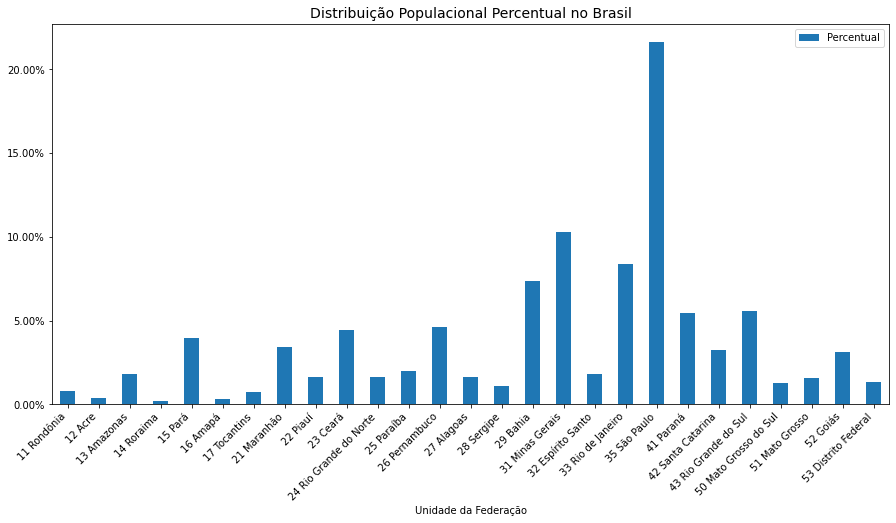

In [163]:
ax = populacao_df.plot(y="Percentual", kind="bar", figsize=(15, 7))
#Formatando os labels do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}%"))
#Título do gráfico
plt.title("Distribuição Populacional Percentual no Brasil", size=14)
plt.xticks(rotation=45, ha="right")
plt.show()

Abaixo plotaremos um gráfico para cada dataframe, a intenção dos gráficos abaixo é detectar algum possível outlier e uma verificação rápida se seguem os padrões do gráfico de distribuição populacional

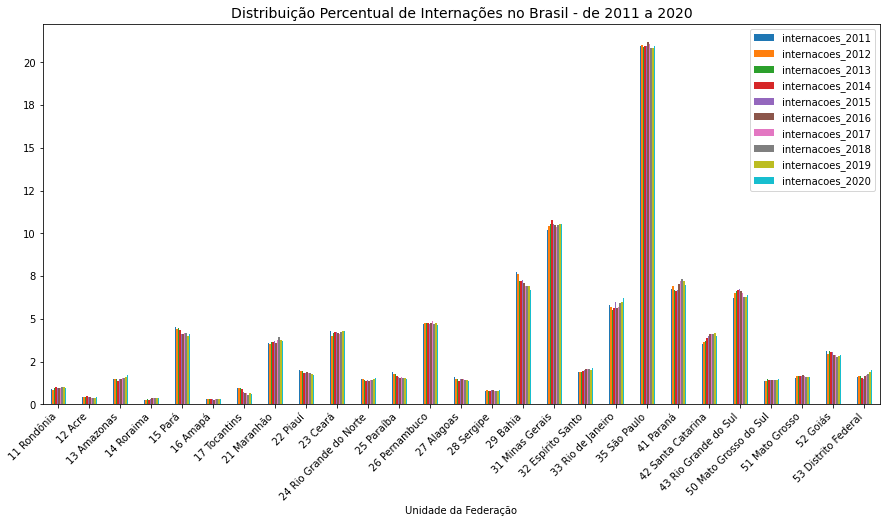

In [164]:
ax = internacoes.loc[:, "internacoes_2011": "internacoes_2020"].plot(kind="bar", figsize=(15, 7))
#Formatando os labels do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
#Título do gráfico
plt.title("Distribuição Percentual de Internações no Brasil - de 2011 a 2020", size=14)
plt.xticks(rotation=45, ha="right")
plt.show()

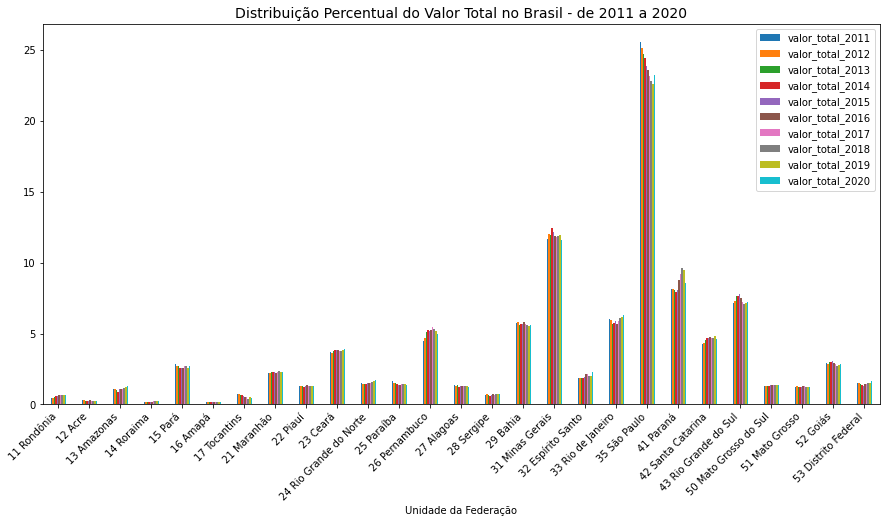

In [165]:
ax = valor_total.loc[:, "valor_total_2011": "valor_total_2020"].plot(kind="bar", figsize=(15, 7))
#Formatando os labels do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
#Título do gráfico
plt.title("Distribuição Percentual do Valor Total no Brasil - de 2011 a 2020", size=14)
plt.xticks(rotation=45, ha="right")
plt.show()

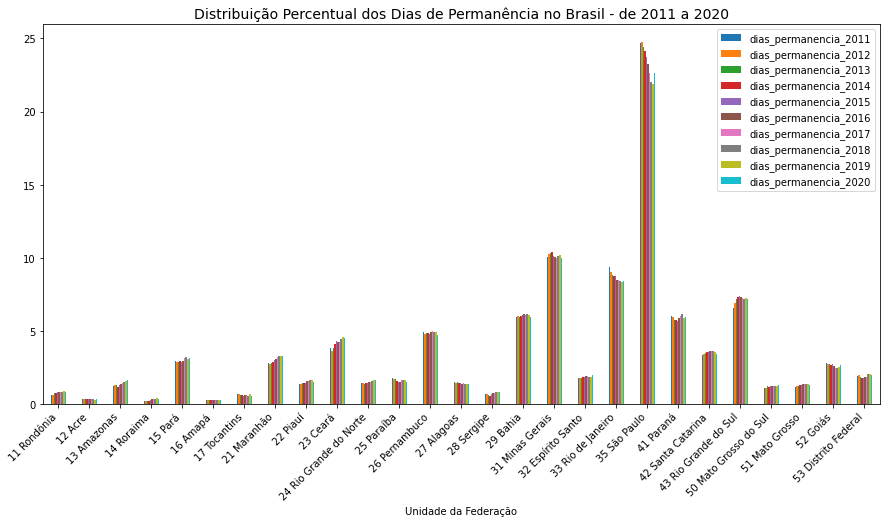

In [166]:
ax = dias_permanencia.loc[:, "dias_permanencia_2011": "dias_permanencia_2020"].plot(kind="bar", figsize=(15, 7))
#Formatando os labels do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
#Título do gráfico
plt.title("Distribuição Percentual dos Dias de Permanência no Brasil - de 2011 a 2020", size=14)
plt.xticks(rotation=45, ha="right")
plt.show()

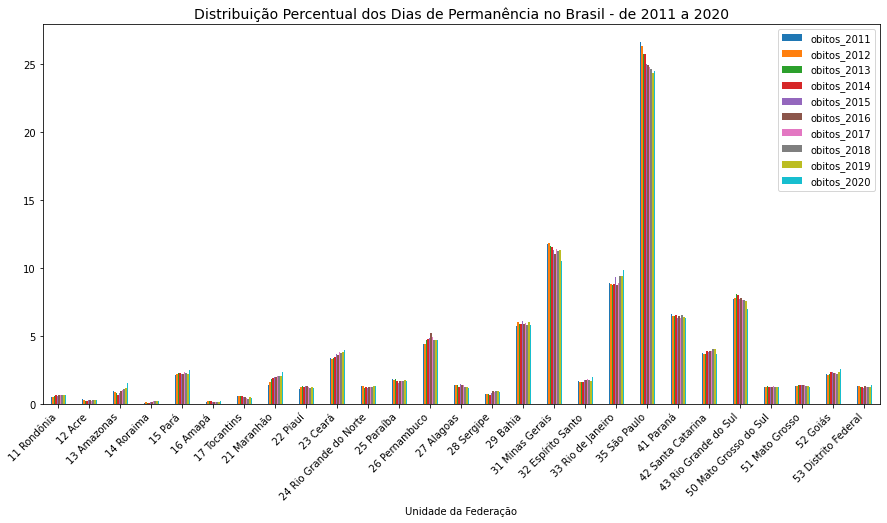

In [167]:
ax = obitos.loc[:, "obitos_2011": "obitos_2020"].plot(kind="bar", figsize=(15, 7))
#Formatando os labels do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
#Título do gráfico
plt.title("Distribuição Percentual dos Dias de Permanência no Brasil - de 2011 a 2020", size=14)
plt.xticks(rotation=45, ha="right")
plt.show()

É possível observar que todos os gráficos dos indicadores seguem o mesmo padrão do gráfico de distribuição populacional, e não identificamos nenhum outlier que mereça uma análise mais detalhada. Vamos comparar todos os anos com a distribuição populacional

In [168]:
for arquivo in datasus_arquivos:
    arquivo["populacao"] = populacao_df["Percentual"]

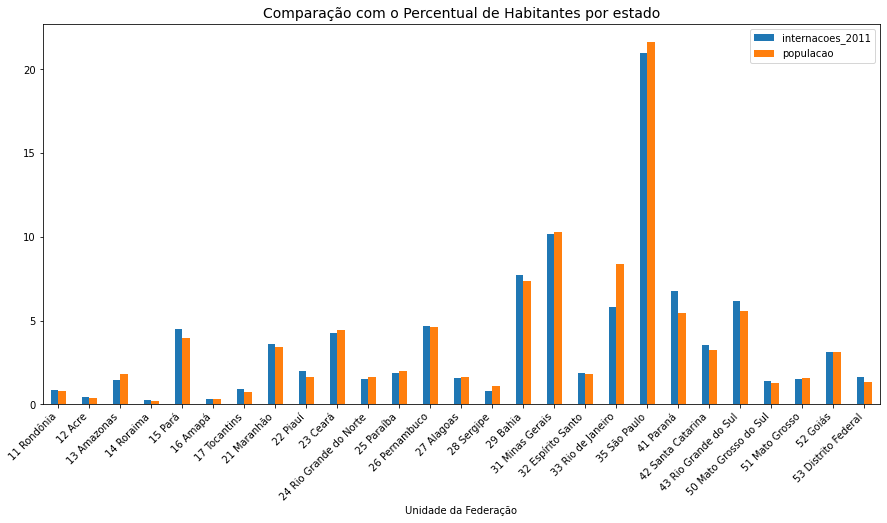

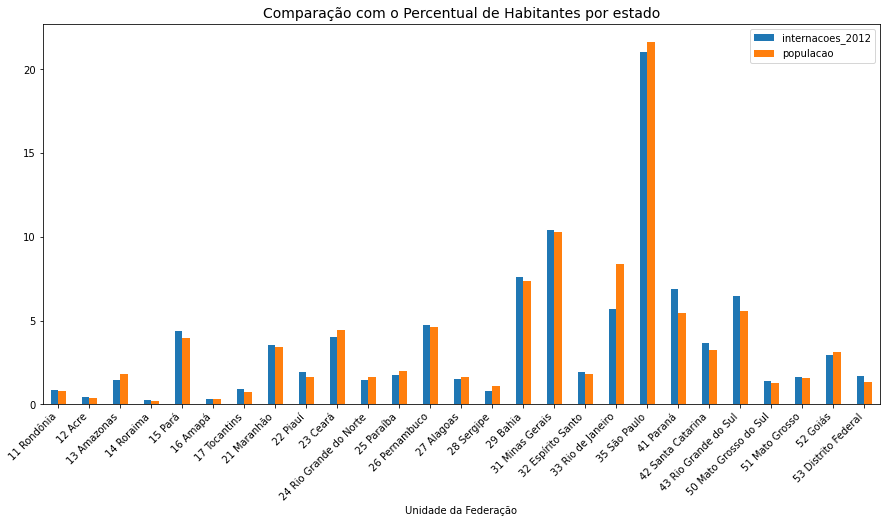

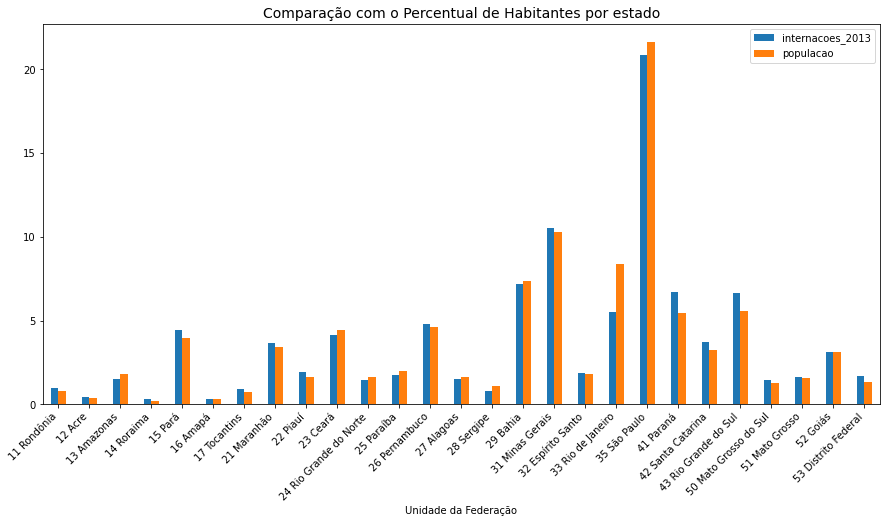

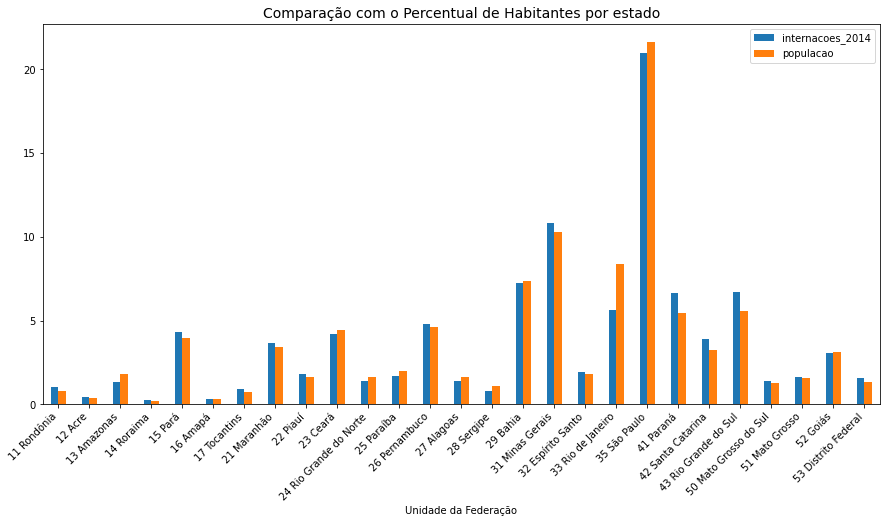

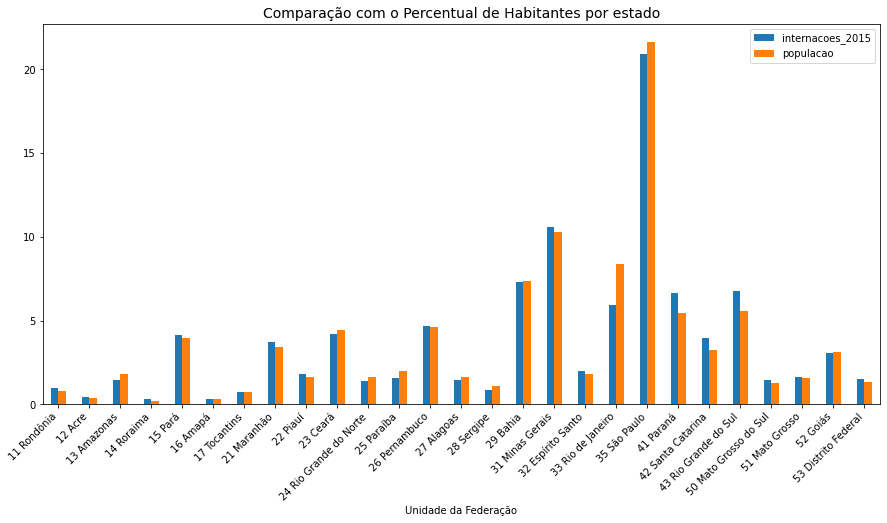

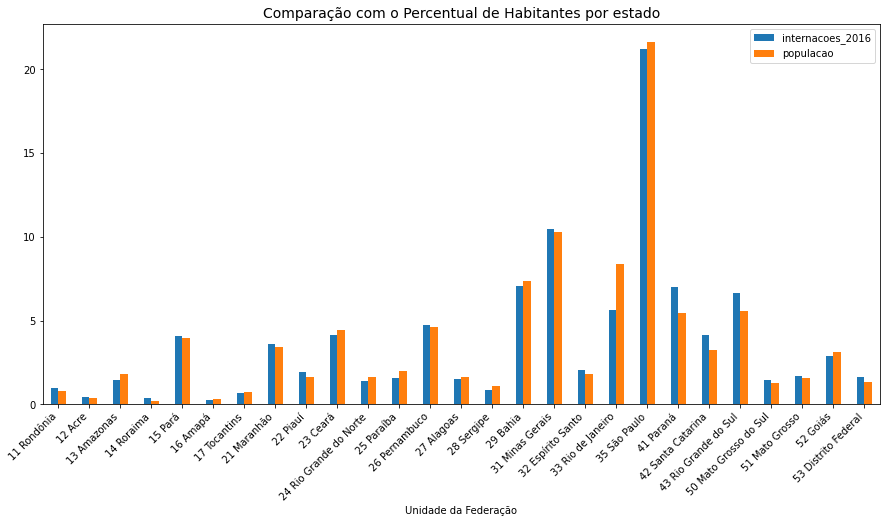

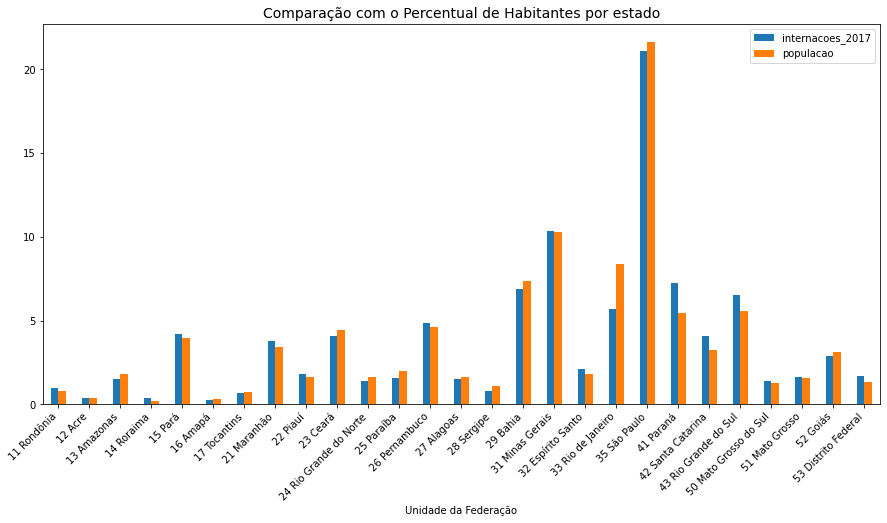

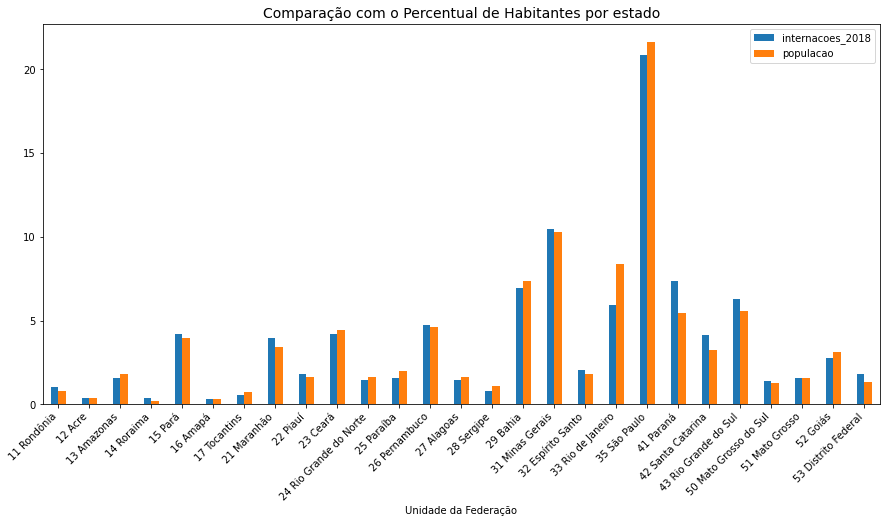

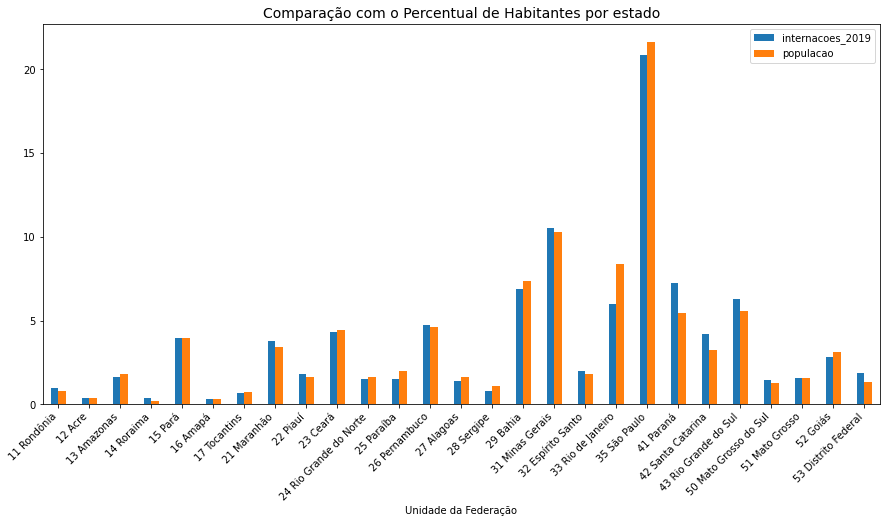

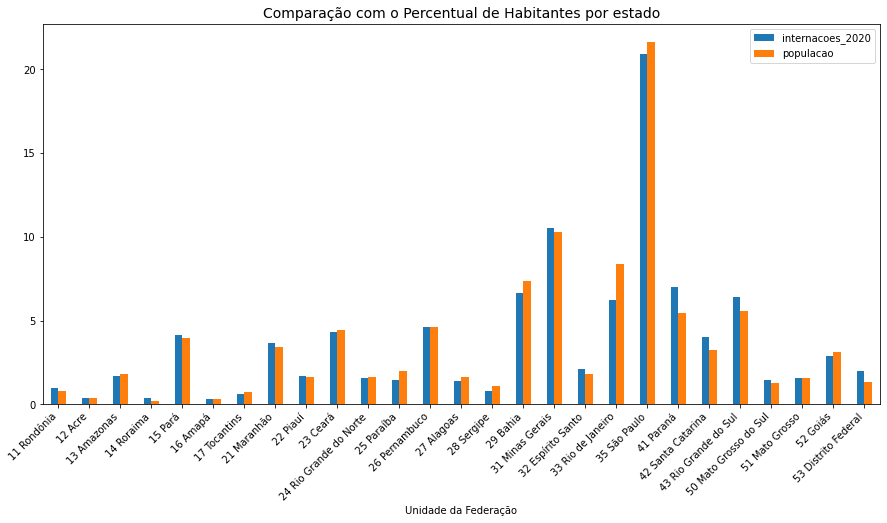

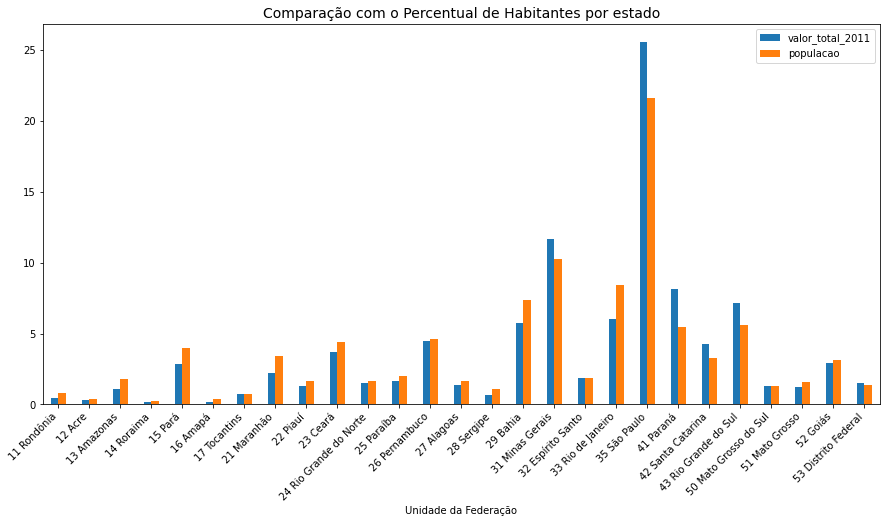

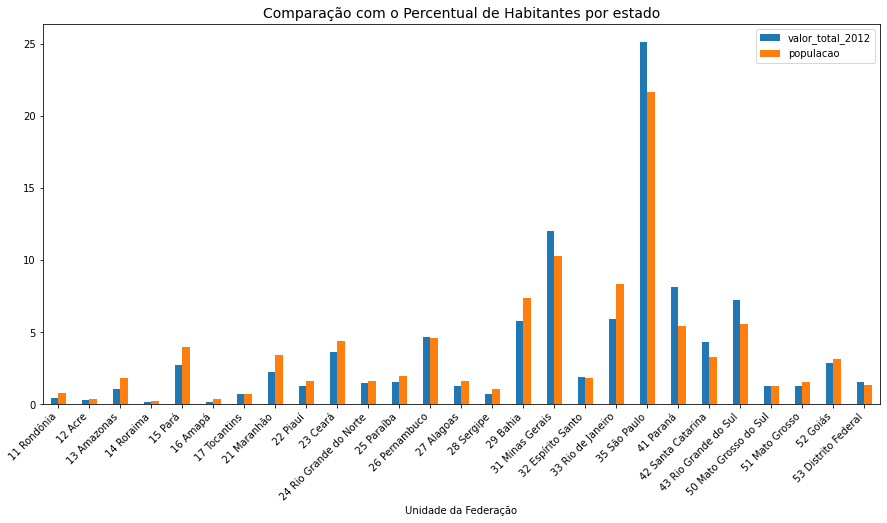

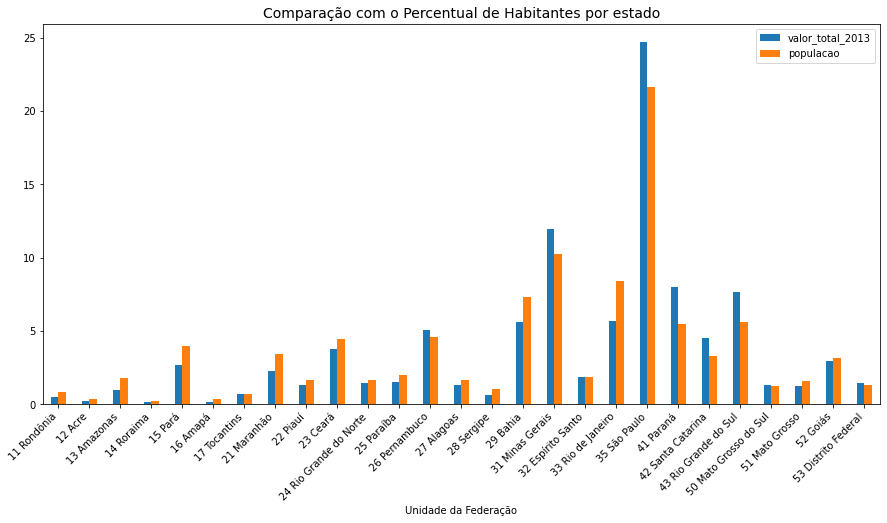

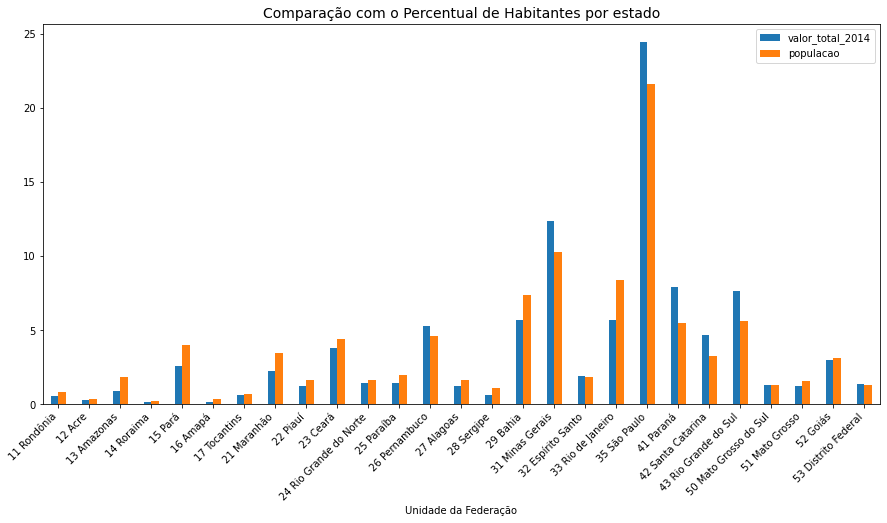

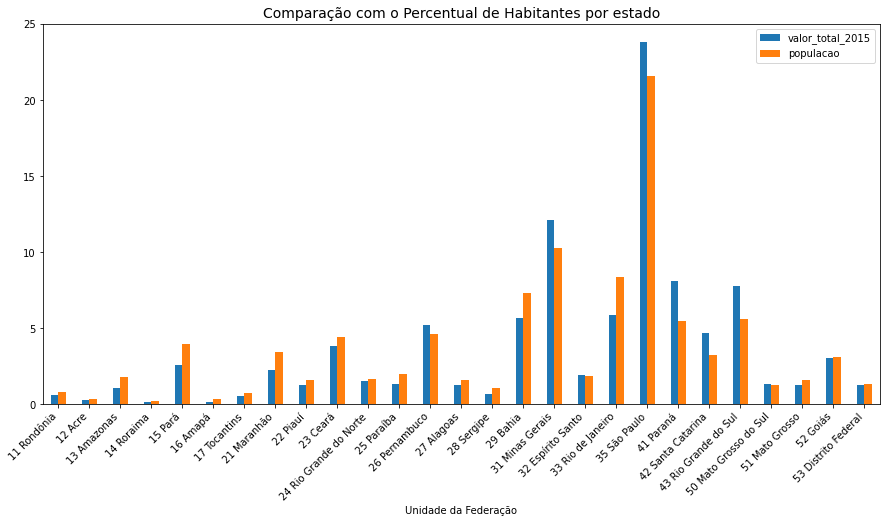

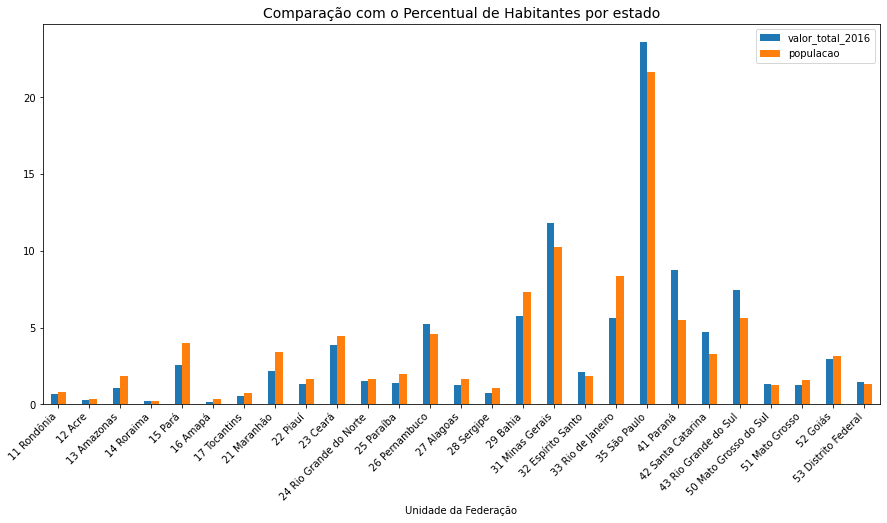

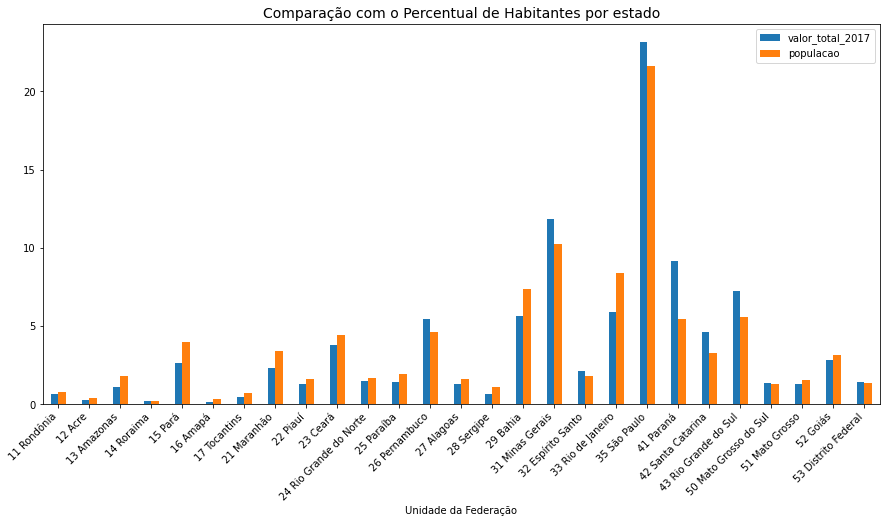

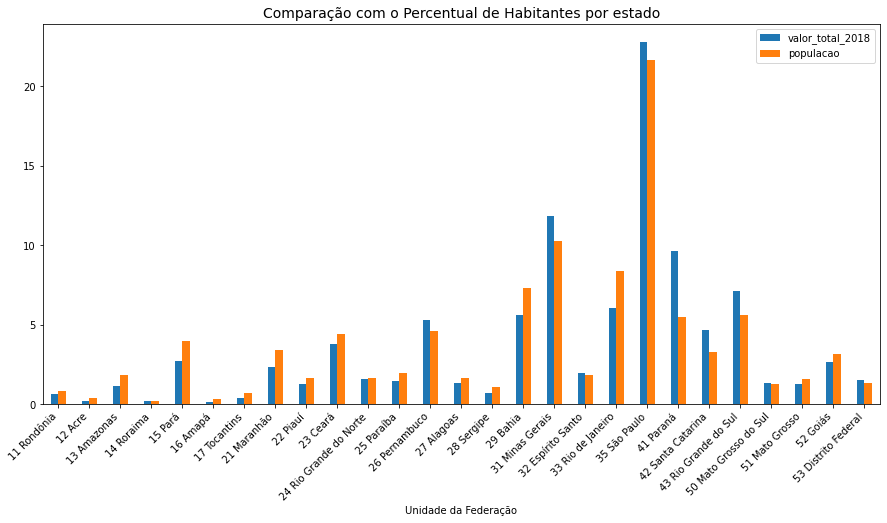

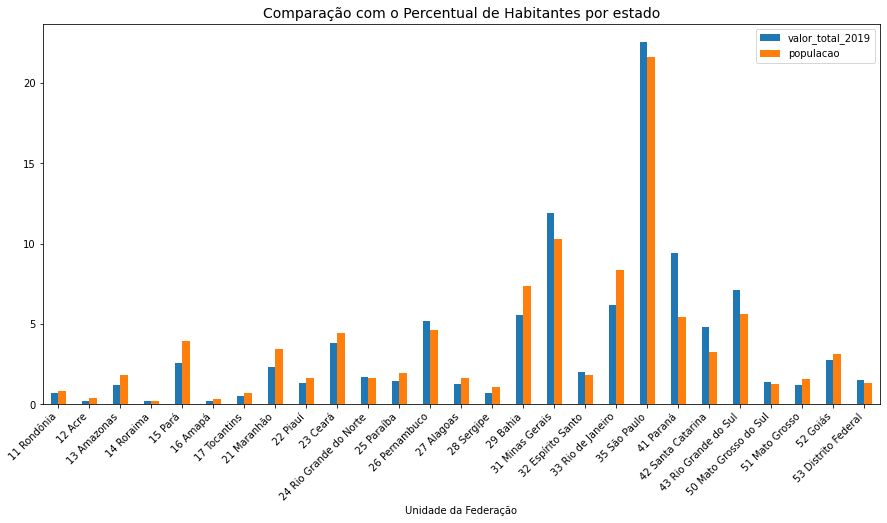

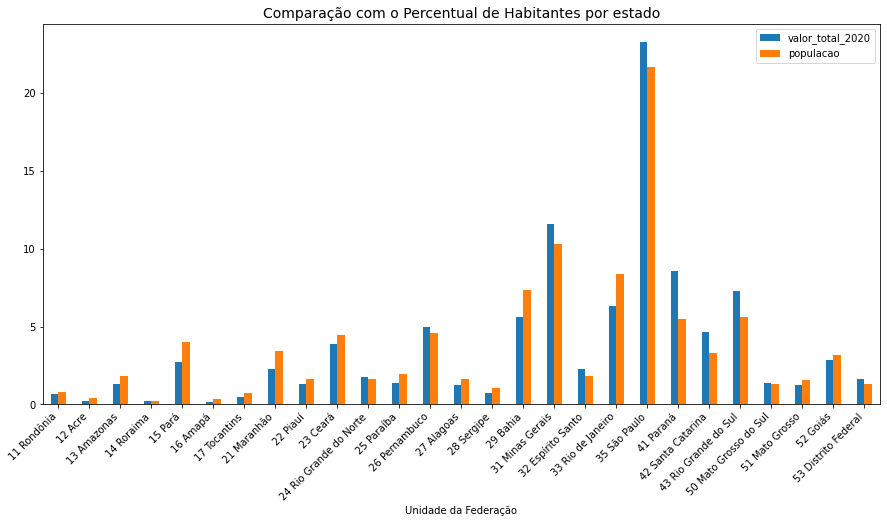

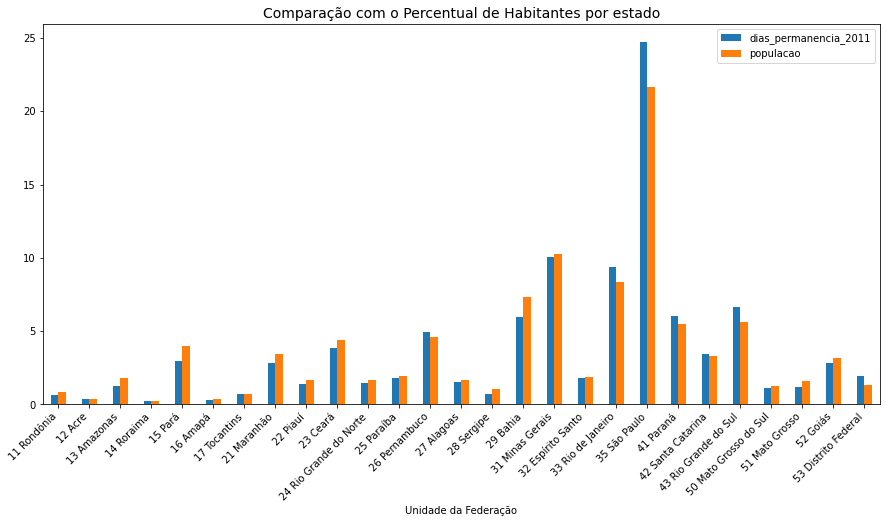

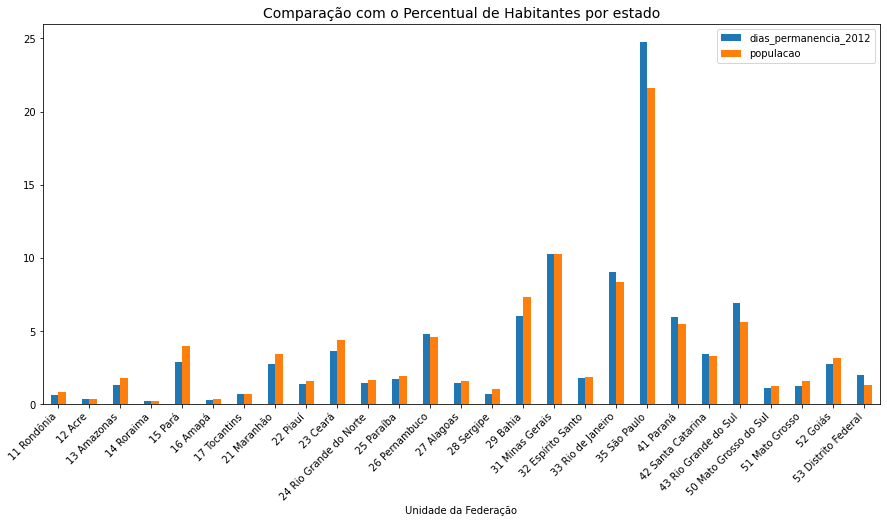

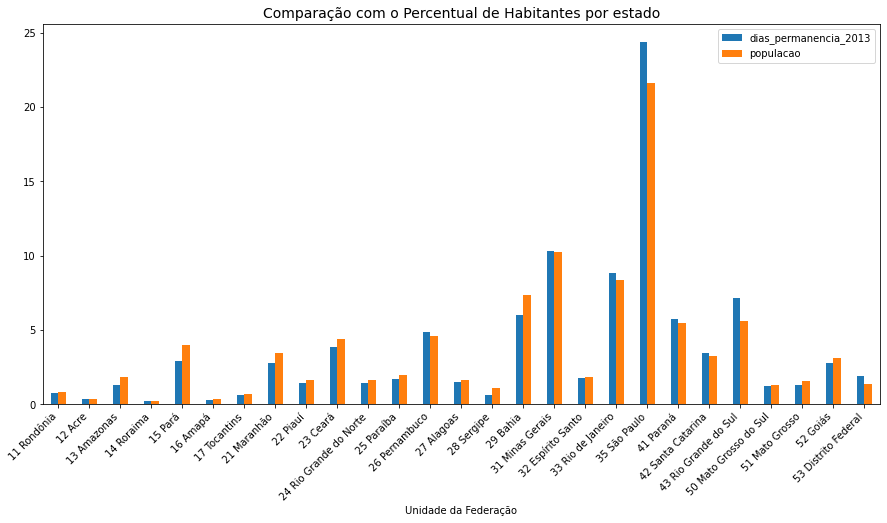

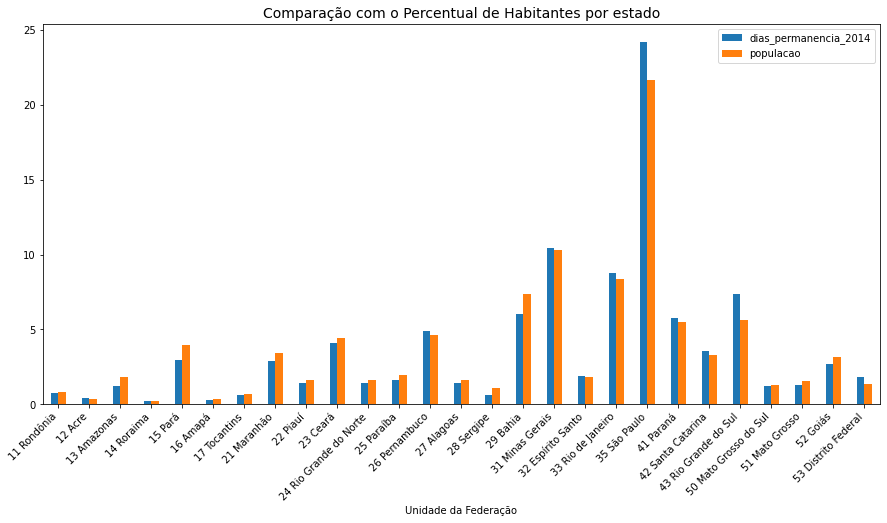

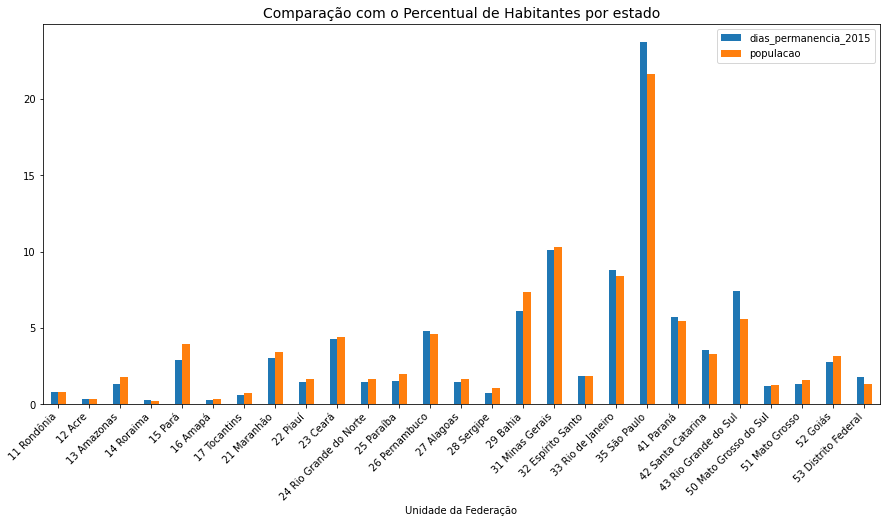

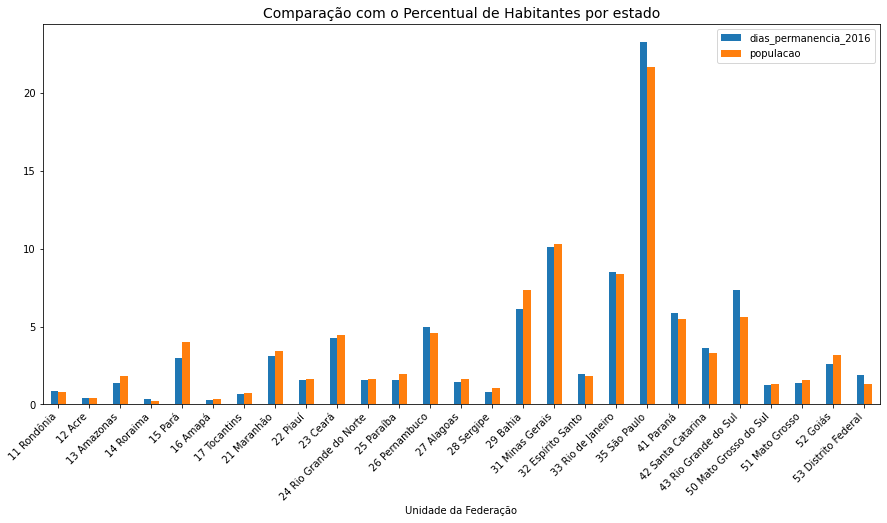

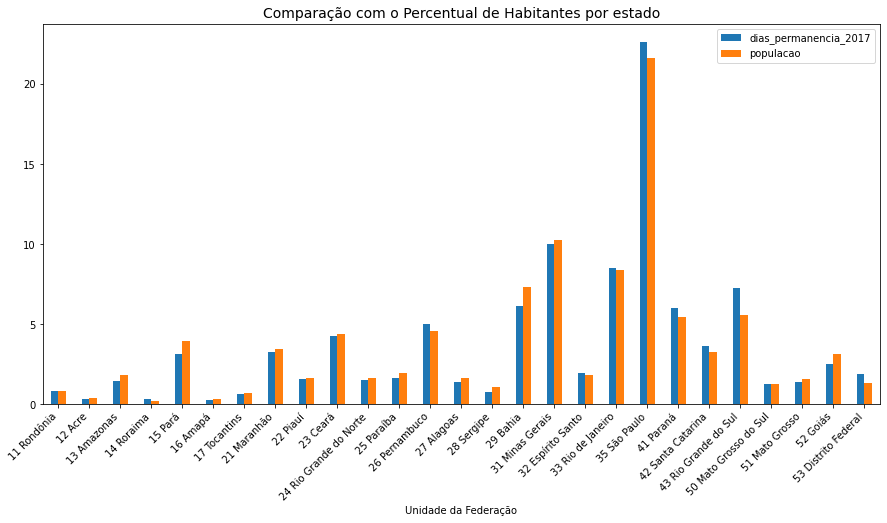

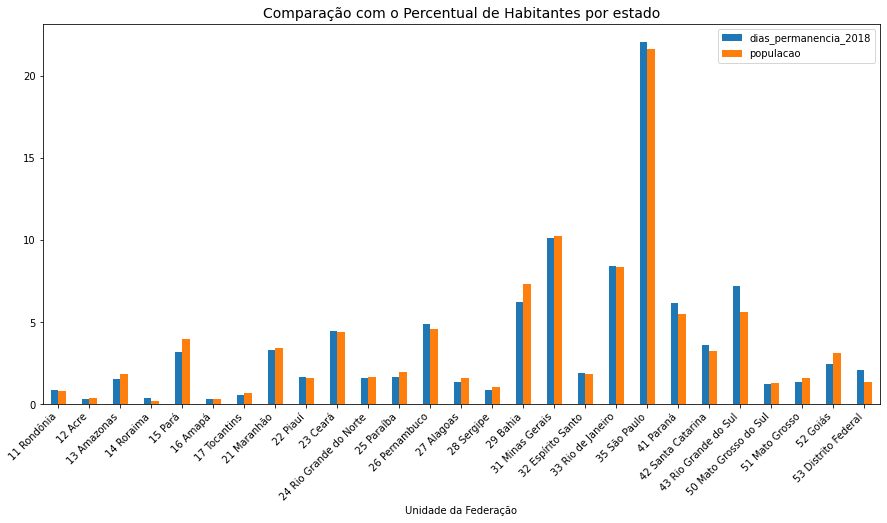

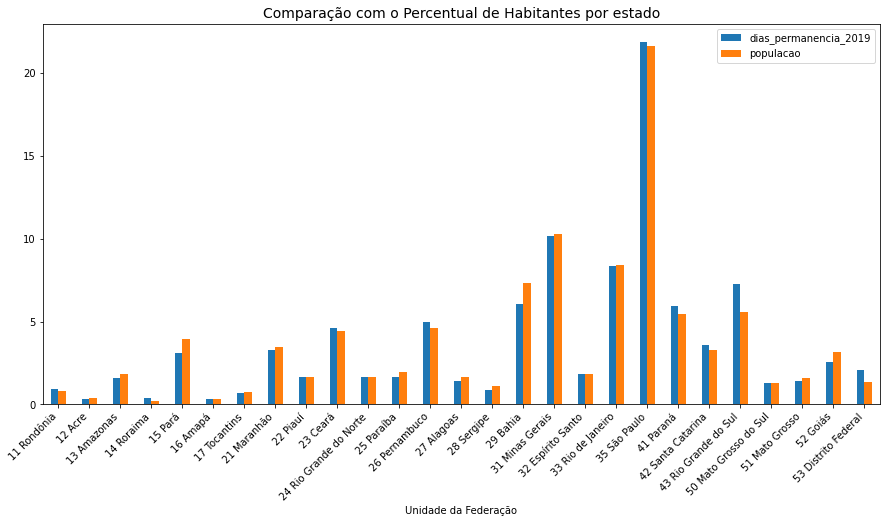

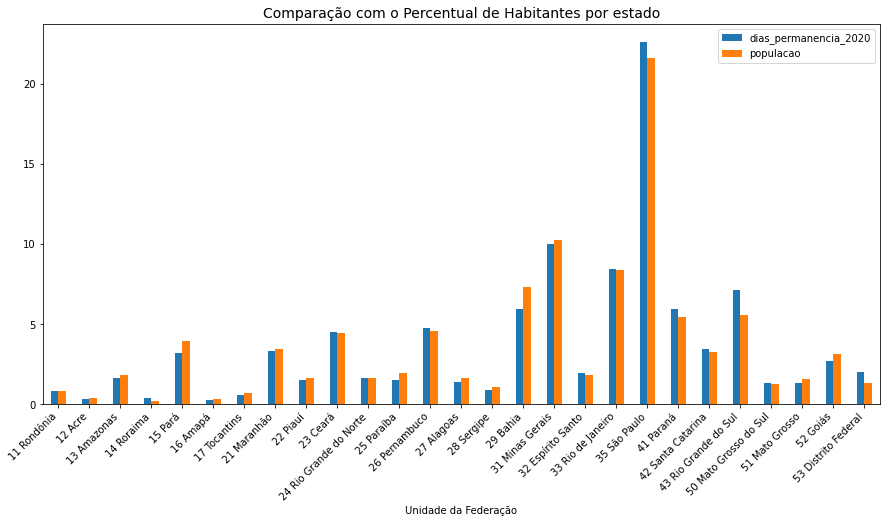

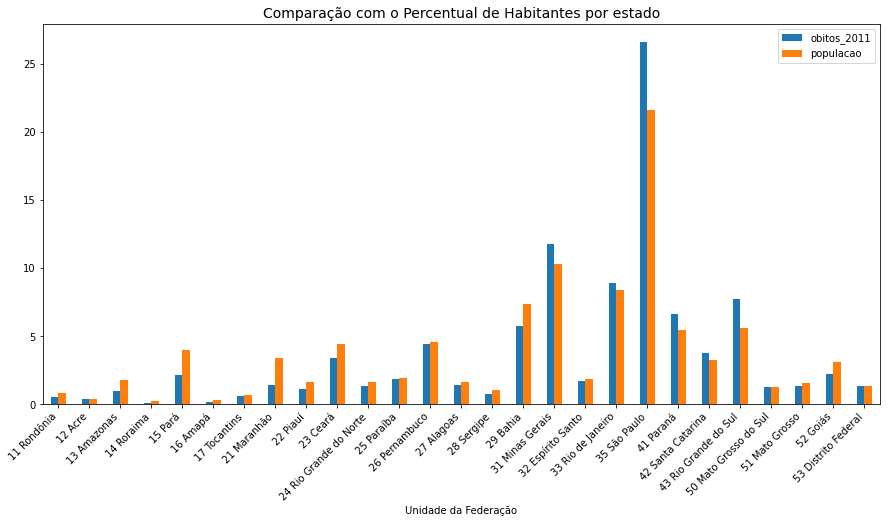

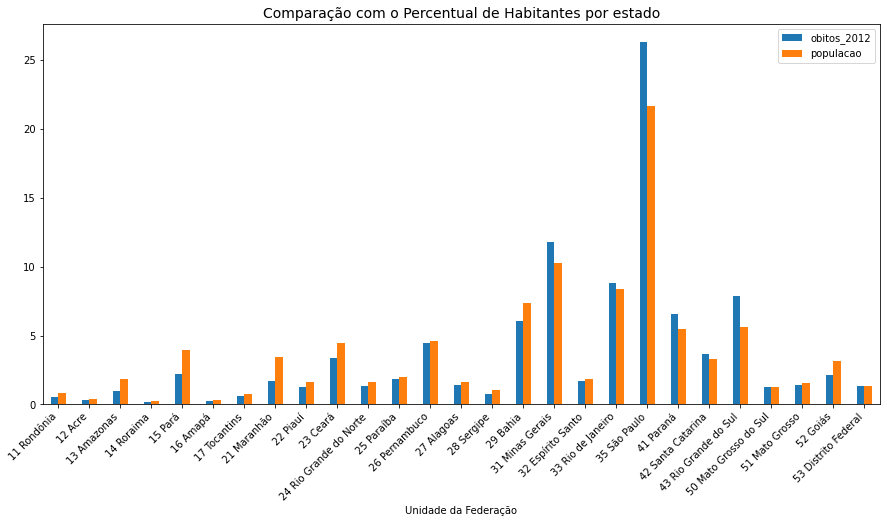

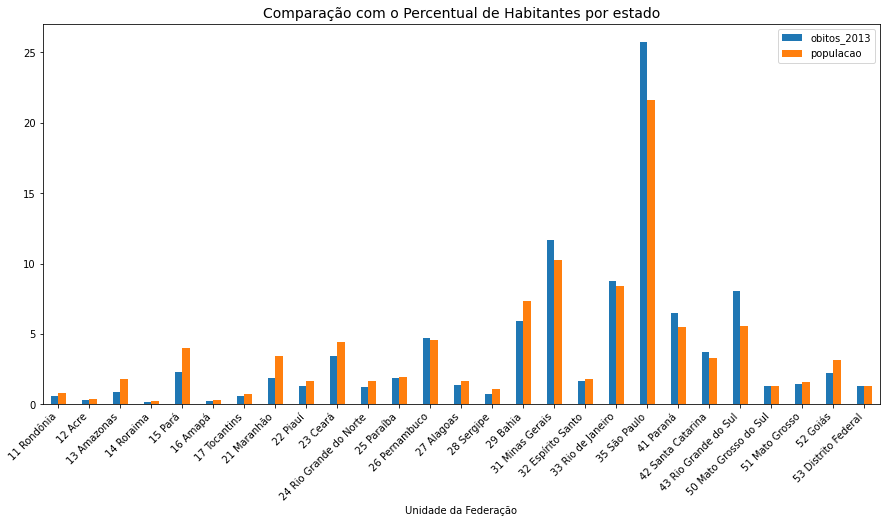

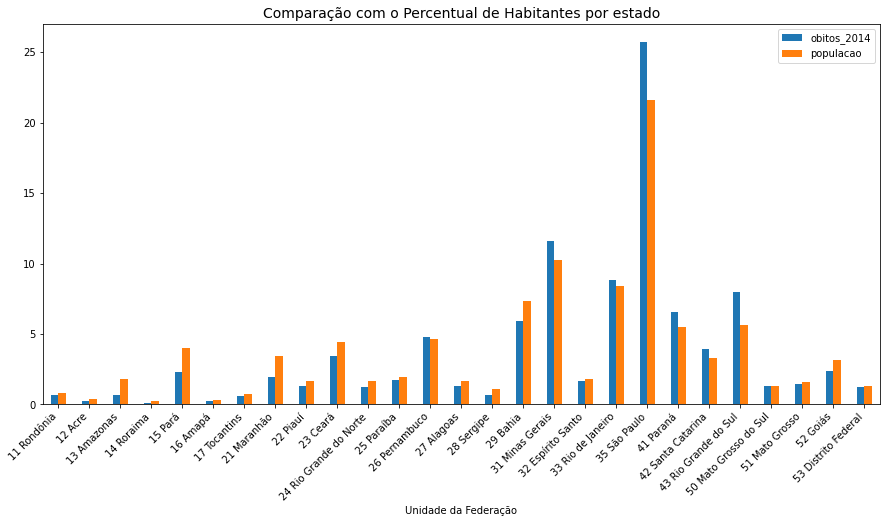

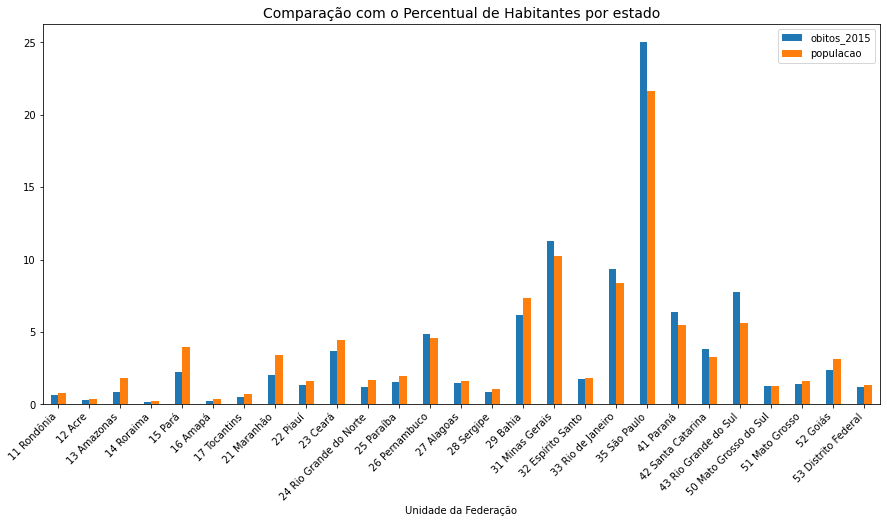

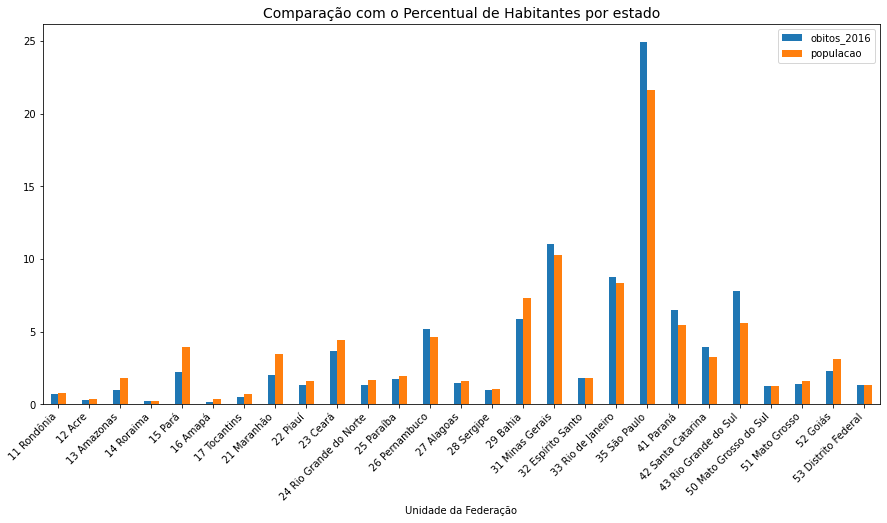

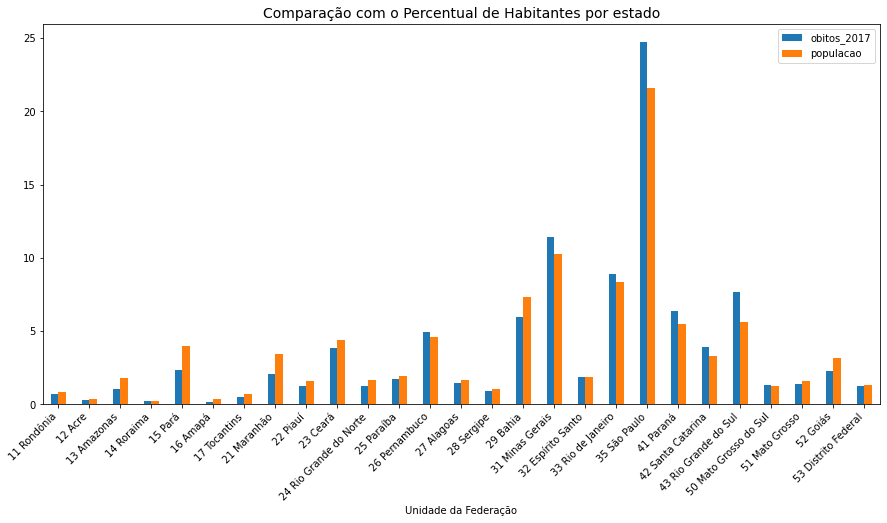

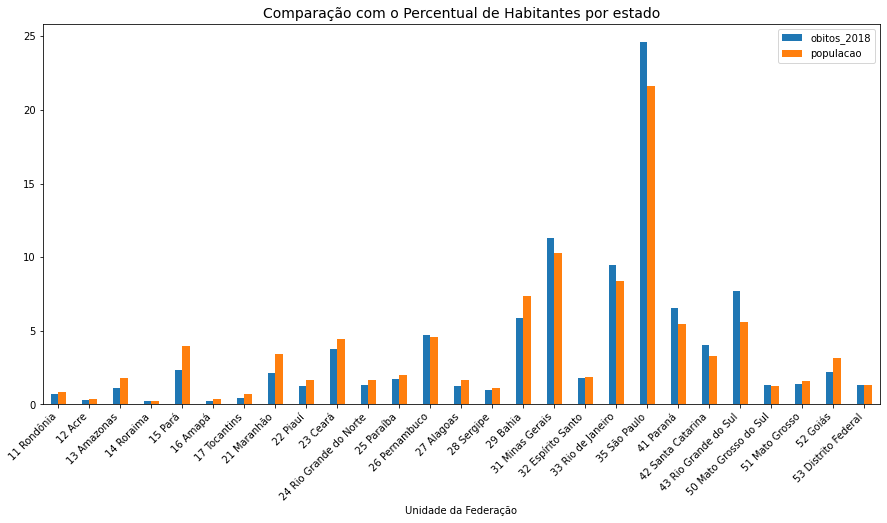

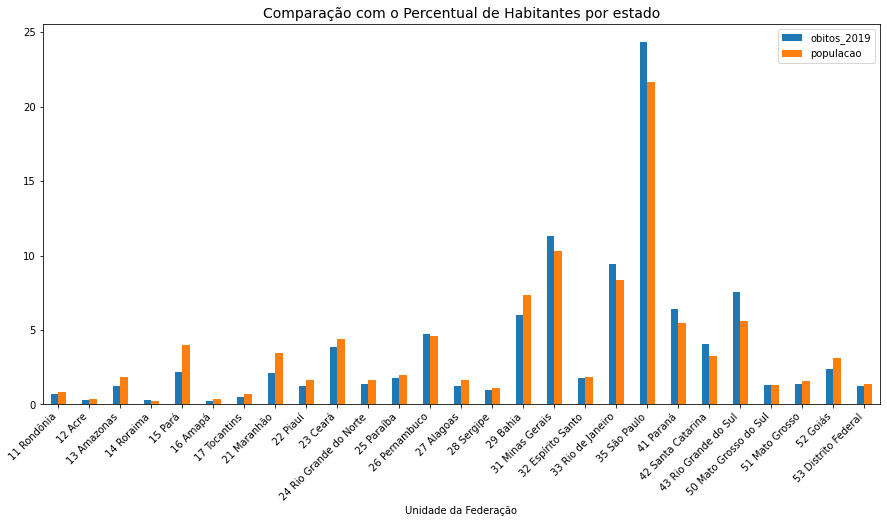

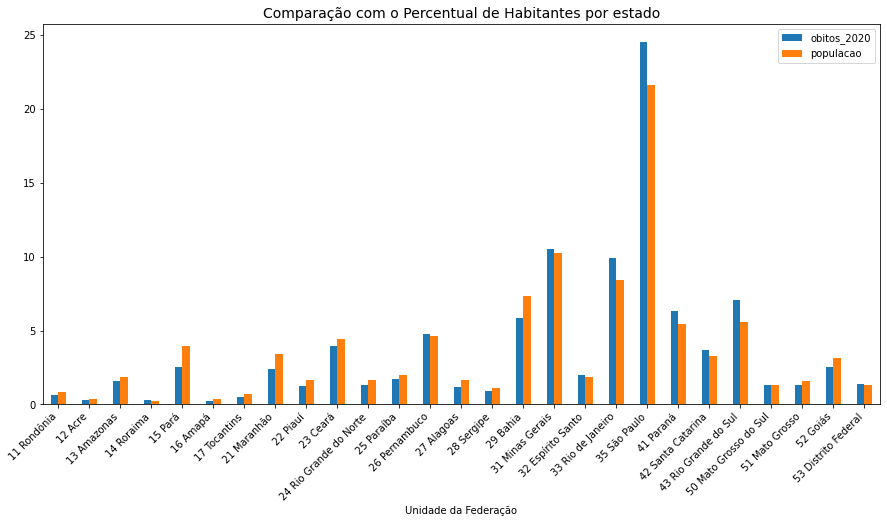

In [171]:
for arquivo in datasus_arquivos:
    for ano in anos:
        nome_df = get_df_name(arquivo)
        ax = arquivo[[f"{nome_df}_{ano}", "populacao"]].plot(kind="bar", figsize=(15, 7))
        #Formatando os labels do eixo y
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
        #Título do gráfico
        plt.title(f"Comparação com o Percentual de Habitantes por estado", size=14)
        plt.xticks(rotation=45, ha="right")
        plt.show()

É possível observar que o Paraná gasta muito mais que o Rio de Janeiro em Valor Total. Essa situação também acontece com o estado do Rio Grande do Sul mas numa diferença menor, por isso é interessante uma investigação posterior para entende. A diferença entre o percentual de habitantes e o número de óbitos também é perceptível no RS e é interessante uma averiguação dos motivos